In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
#plots
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Ellipse
import seaborn as sns
import plotly.express as ex
from matplotlib.patches import Patch, Circle
#pre-processing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#model selection
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold
# random forest
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
# adaboost
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
# GradiendBoost
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
#Knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.inspection import permutation_importance
# decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# model evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

RSEED = 10

In [2]:
diabetes_data_Stroke = pd.read_csv('hakatonDataset.csv')
diabetes_data_Heart = pd.read_csv('hakatonDataset.csv')
sns.set()

In [3]:
diabetes_data_Stroke.head(15)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


# Pre-processing

# Imputation method

In [4]:
diabetes_data_Stroke[diabetes_data_Stroke['Diabetes_012'] == 2]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [5]:
diabetes_data_Stroke.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

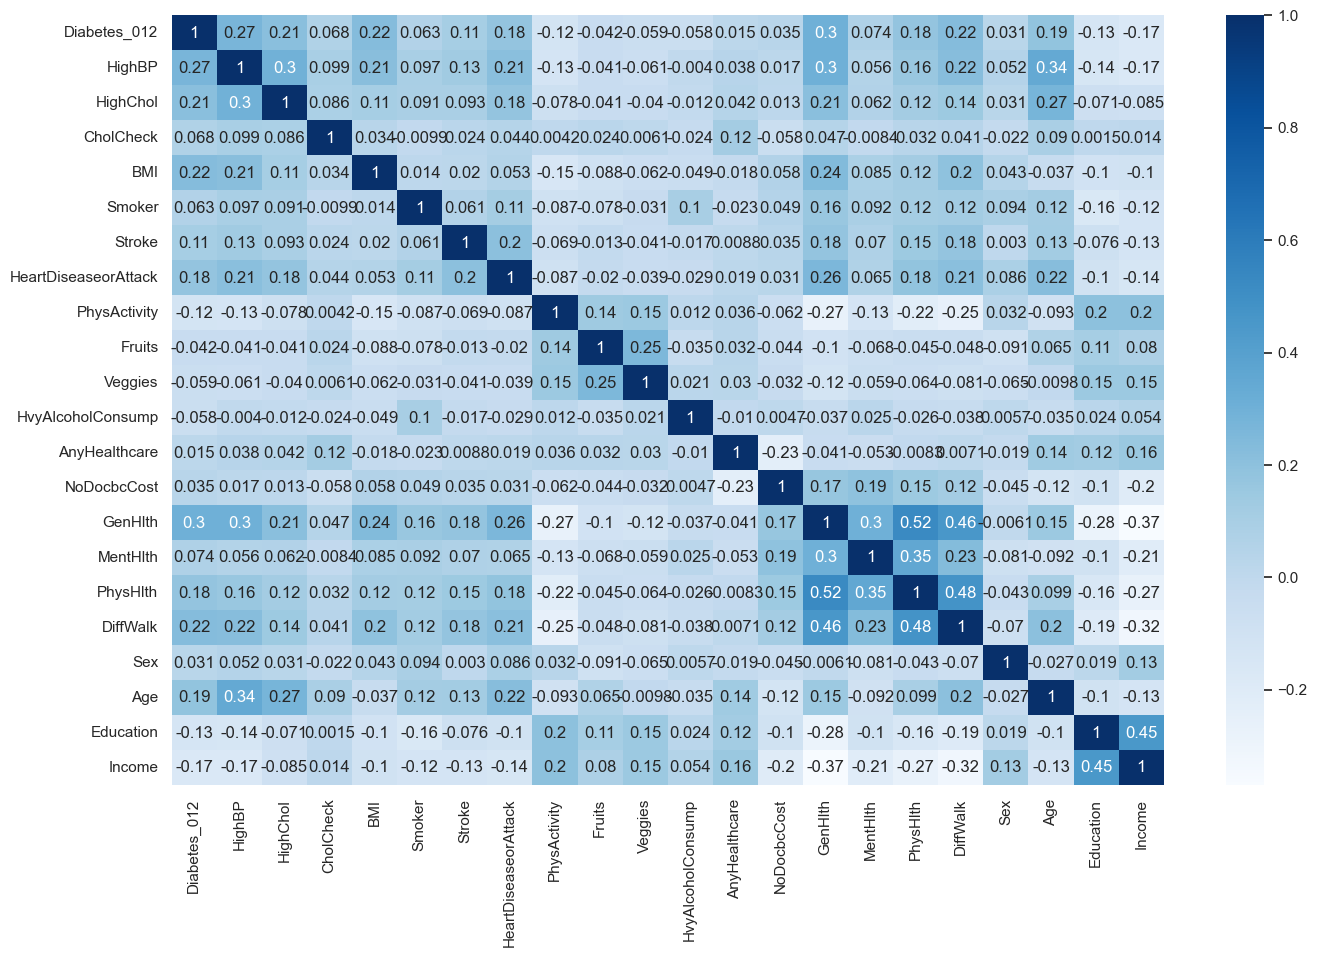

In [6]:
# create correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(diabetes_data_Stroke.corr(), annot=True, cmap='Blues')
plt.show()

# Here we search the correlation between the features and the target 

In [7]:
# Assuming you have a DataFrame named 'data' with your features and target variable
# 'satisfaction' represents the satisfaction score and 'time_until_termination' represents the target variable
correlation_matrix =diabetes_data_Stroke.corr()
correlation_with_target = correlation_matrix['Stroke'].drop('Stroke')

print(correlation_with_target)

Diabetes_012            0.107179
HighBP                  0.129575
HighChol                0.092620
CholCheck               0.024158
BMI                     0.020153
Smoker                  0.061173
HeartDiseaseorAttack    0.203002
PhysActivity           -0.069151
Fruits                 -0.013389
Veggies                -0.041124
HvyAlcoholConsump      -0.016950
AnyHealthcare           0.008776
NoDocbcCost             0.034804
GenHlth                 0.177942
MentHlth                0.070172
PhysHlth                0.148944
DiffWalk                0.176567
Sex                     0.002978
Age                     0.126974
Education              -0.076009
Income                 -0.128599
Name: Stroke, dtype: float64


## we drop irrelavant features and those who have high corrlation with target 'Stroke'

In [8]:
diabetes_data_Stroke = diabetes_data_Stroke.drop('Education',axis=1)
diabetes_data_Stroke = diabetes_data_Stroke.drop('Income',axis=1)
diabetes_data_Stroke = diabetes_data_Stroke.drop('HeartDiseaseorAttack',axis=1)


In [9]:
# Define a function to classify BMI values
def classify_bmi(bmi):
    if bmi < 18.5:
        return -1
    elif bmi >= 18.5 and bmi <= 25:
        return 0
    else:
        return 1

# Apply the classification function to create a new column 'BMI_Class'
diabetes_data_Stroke['BMI'] = diabetes_data_Stroke['BMI'].apply(classify_bmi)

In [13]:
diabetes_data_Stroke.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
5,0.0,1.0,1.0,1.0,0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0
6,0.0,1.0,0.0,1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0
7,0.0,1.0,1.0,1.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0
8,2.0,1.0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
9,0.0,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0


# Transformation

explanation: if we have "MentHlth , PhysHlth,Age" with large values, and the other features have small values, we can apply feature scaling to ensure that all the features are on a similar scale. Feature scaling is important for many machine learning algorithms, especially those that are sensitive to the scale of input features that will we apply in the next sections.

In [14]:
# Create a scaler object
scaler = MinMaxScaler()

# Apply min-max scaling to the "salary" column
diabetes_data_Stroke['MentHlth'] = scaler.fit_transform(diabetes_data_Stroke[['MentHlth']])
diabetes_data_Stroke['PhysHlth'] = scaler.fit_transform(diabetes_data_Stroke[['PhysHlth']])
diabetes_data_Stroke['Age'] = scaler.fit_transform(diabetes_data_Stroke[['Age']])


In [15]:
x = diabetes_data_Stroke.drop(columns=['Stroke'])
y = diabetes_data_Stroke['Stroke']

In [16]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RSEED)

In [17]:
models_compare = pd.DataFrame(columns=['AdaBoostRegressor','GradientBoostingRegressor','KNeighborsRegressor','RandomForestRegressor'])

# Adaboost Regressor

In [18]:
# Create an instance of AdaBoostRegressor
adaboost = AdaBoostRegressor(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.5, 1, 1.5],
    'n_estimators': [5, 15, 20]
}

# define grid search
grid_search = GridSearchCV(estimator=adaboost, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,learning_rate,n_estimators
Selected Value,1,5


In [21]:
y_pred = best.predict(x_test)

In [22]:
# calculate MSE
MSE = ((np.square(y_pred - y_test)).mean())
models_compare['AdaBoostRegressor'] = [MSE]
df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'AdaBoostRegressor'}, columns={0: 'MSE'})
df

,MSE
AdaBoostRegressor,0.036665


MSE is a measure 

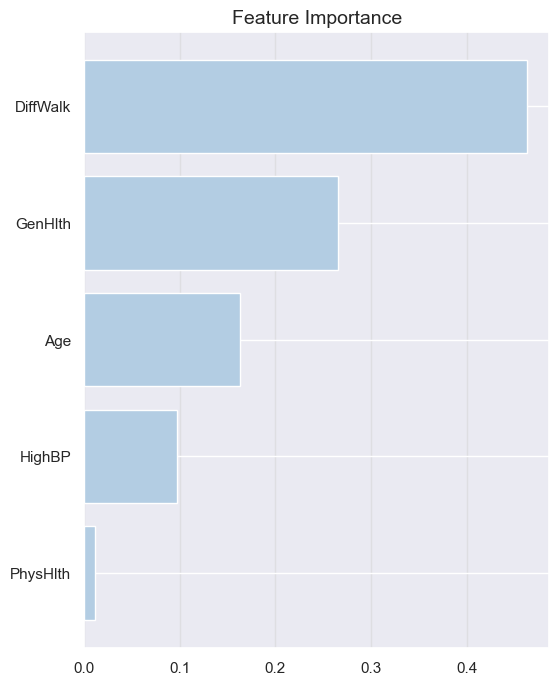

In [23]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(x_train, y_train).feature_importances_, 
                   index=x_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(6, 8))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

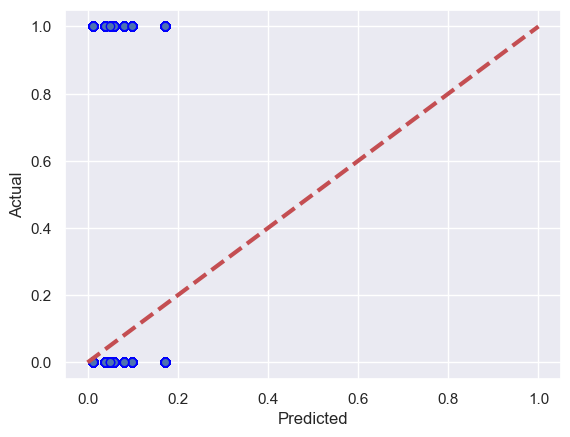

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# GradientBoostingRegressor

In [25]:
# define model
gb = GradientBoostingRegressor(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'learning_rate': [0.5, 1, 1.5],
    'n_estimators': [5, 15, 20]
}

# define grid search
grid_search = GridSearchCV(estimator=gb, param_grid=parameters_grid, cv=10)

In [26]:
# fit estimator
grid_search.fit(x_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,learning_rate,n_estimators
Selected Value,0.5,15.0


In [27]:
# predict
y_pred = best.predict(x_test)

# calculate MSE
MSE = ((np.square(y_pred - y_test)).mean())
models_compare['GradientBoostingRegressor'] = [MSE]
df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'Gradient Boosting Regressor'}, columns={0: 'MSE'})
df

,MSE
Gradient Boosting Regressor,0.036128


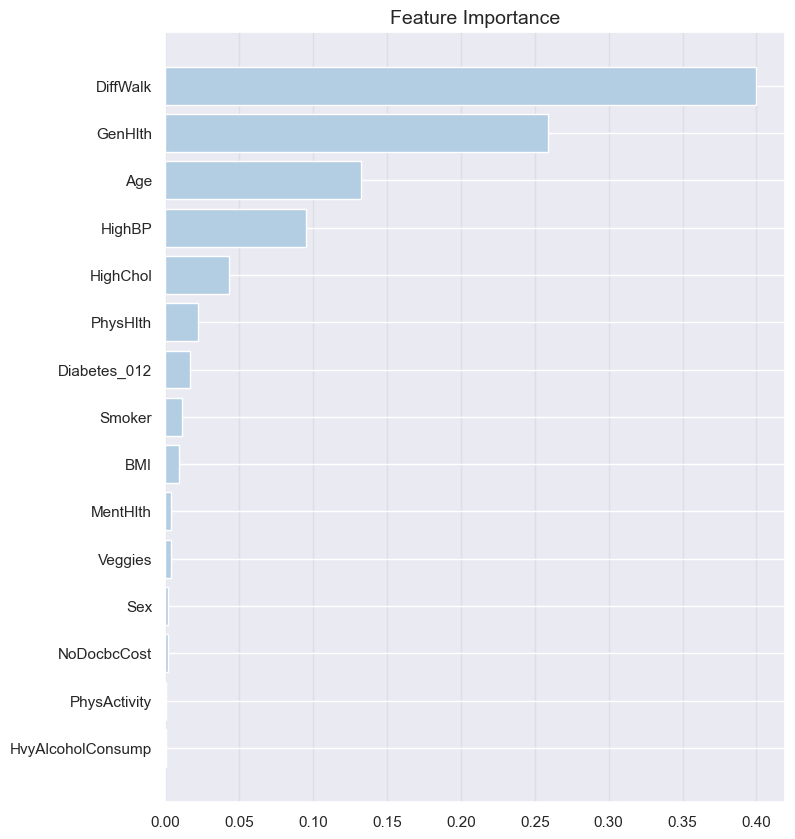

In [28]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(x_train, y_train).feature_importances_, 
                   index=x_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

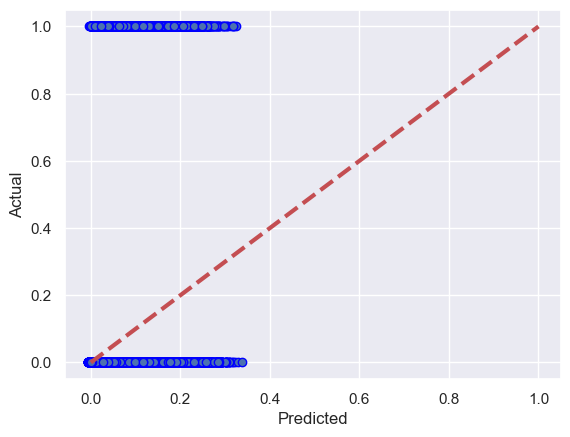

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# KNeighborsRegressor

In [30]:
# define model
knn = KNeighborsRegressor()

# define parameter grid
parameters_grid = {
    'n_neighbors': [5, 10, 15, 25, 50],
    'weights': ['uniform', 'distance']
}

# define grid search
grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x_train, y_train)

# get best estimator
best = grid_search.best_estimator_

# print best parameters
pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['Selected Value']).T

,n_neighbors,weights
Selected Value,50,uniform


In [31]:
# predict
y_pred = best.predict(x_test)

# calculate MSE
MSE = ((np.square(y_pred - y_test)).mean())
models_compare['KNeighborsRegressor'] = [MSE]
df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'KNN Regressor'}, columns={0: 'MSE'})
df

,MSE
KNN Regressor,0.036983


In [ ]:
Knn_model = grid_search.best_estimator_.fit(x_train, y_train)

# Calculate permutation importances
perm_importance = permutation_importance(Knn_model, x_test, y_test, n_repeats=10, random_state=42)

# Get feature names
feature_names = x.columns

# Calculate mean importances and sort them
mean_importance = perm_importance.importances_mean
sorted_indices = np.argsort(mean_importance)

# Plot feature importances
# Add space between feature names
ytick_labels = [f'{name} ' for name in feature_names[sorted_indices]]

plt.barh(range(len(feature_names)), mean_importance[sorted_indices], color='#b3cde3')
plt.yticks(range(len(feature_names)), ytick_labels)
plt.xlabel('Importance')
plt.title('Permutation Feature Importance - Knn')

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# RandomForestRegressor

In [34]:
# from sklearn.ensemble import RandomForestRegressor

# define model
rf = RandomForestRegressor(random_state=RSEED)

# define parameter grid
parameters_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# define grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid, cv=10)

# fit estimator
grid_search.fit(x_train, y_train)

# get best estimator
best = grid_search.best_estimator_
y_pred = best.predict(x_test)


KeyboardInterrupt: 

In [ ]:
MSE = ((np.square(y_pred - y_test)).mean())
models_compare['RandomForestRegressor'] = [MSE]
df = pd.DataFrame([MSE]).T
df = df.rename(index={0: 'RandomForestRegressor '}, columns={0: 'MSE'})
df

In [ ]:
# get feature importance
imp = pd.DataFrame(grid_search.best_estimator_.fit(x_train, y_train).feature_importances_, 
                   index=x_train.columns, columns=['Importance']).sort_values('Importance')
imp = imp[imp['Importance'] > 0]
# plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(range(0, len(imp)), imp['Importance'], color='#b3cde3')
plt.grid(axis='x', alpha=0.5, color='lightgrey')
plt.yticks(range(0, len(imp)), imp.index)
plt.title('Feature Importance', fontsize=14)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
models_compare.plot.bar(figsize=(12, 6),ylabel='MSE',xlabel='Models',title='Comparing Regression Models');


#Heart

In [ ]:
diabetes_data_Heart[diabetes_data_Heart['Diabetes_012'] == 2]

In [ ]:
# create correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(diabetes_data_Heart.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
# Assuming you have a DataFrame named 'data' with your features and target variable
# 'satisfaction' represents the satisfaction score and 'time_until_termination' represents the target variable
correlation_matrix =diabetes_data_Heart.corr()
correlation_with_target = correlation_matrix['Stroke'].drop('Stroke')

print(correlation_with_target)

In [ ]:
diabetes_data_Heart = diabetes_data_Heart.drop('Education',axis=1)
diabetes_data_Heart = diabetes_data_Heart.drop('Income',axis=1)
diabetes_data_Heart = diabetes_data_Heart.drop('Stroke',axis=1)


In [ ]:
# Define a function to classify BMI values
def classify_bmi(bmi):
    if bmi < 18.5:
        return -1
    elif bmi >= 18.5 and bmi <= 25:
        return 0
    else:
        return 1

# Apply the classification function to create a new column 'BMI_Class'
diabetes_data_Heart['BMI'] = diabetes_data_Heart['BMI'].apply(classify_bmi)

In [ ]:
# Create a scaler object
scaler = MinMaxScaler()

# Apply min-max scaling to the "salary" column
diabetes_data_Heart['MentHlth'] = scaler.fit_transform(diabetes_data_Heart[['MentHlth']])
diabetes_data_Heart['PhysHlth'] = scaler.fit_transform(diabetes_data_Heart[['PhysHlth']])
diabetes_data_Heart['Age'] = scaler.fit_transform(diabetes_data_Heart[['Age']])
